In [39]:
import pandas as pd
import numpy as np

In [40]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [41]:
df = pd.read_csv(url, header=None, encoding='utf-8')

In [42]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
y = df.iloc[0:100, 4].values
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [44]:
y = np.where(y=='Iris-setosa', 0, 1)
y[:5]

array([0, 0, 0, 0, 0])

In [45]:
X = df.iloc[:100, [0,2]].values
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [46]:
import matplotlib.pyplot as plt

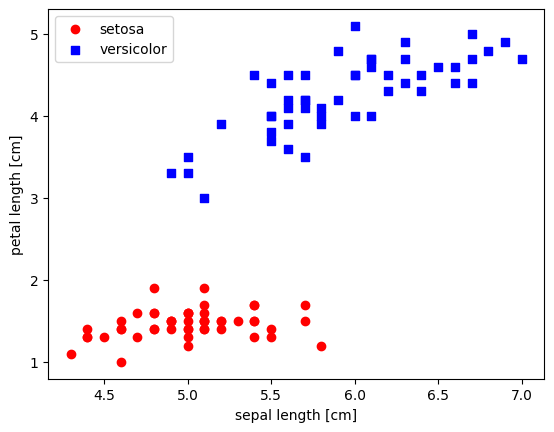

In [47]:
plt.scatter(X[:50, 0], X[:50, 1], marker='o', color='red', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], marker='s', color='blue', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

In [48]:
class Adaline:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for _ in range(self.n_iter):
            output = self.activation(self.net_input(X))
            error = y - output
            # update parameters using gradient descent
            self.w_ += self.eta * 2 * X.T.dot(error) / X.shape[0]
            self.b_ += self.eta * 2 * error.mean()
            loss = (error ** 2).mean()
            self.losses_.append(loss)
        return self


    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, input):
        return input

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

[]

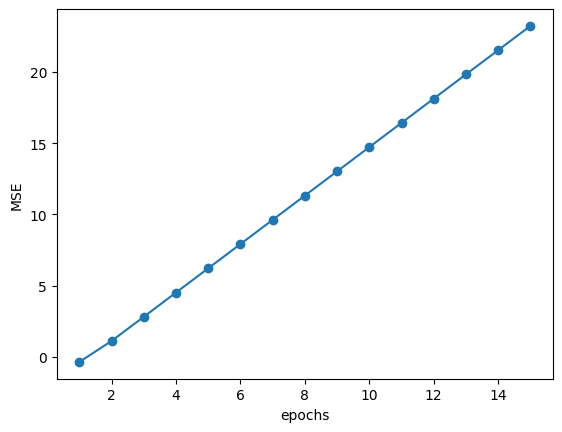

In [49]:
ada = Adaline(eta=0.1, n_iter=15).fit(X,y)
plt.plot(range(1, len(ada.losses_)+1), np.log10(ada.losses_), marker='o')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.plot()

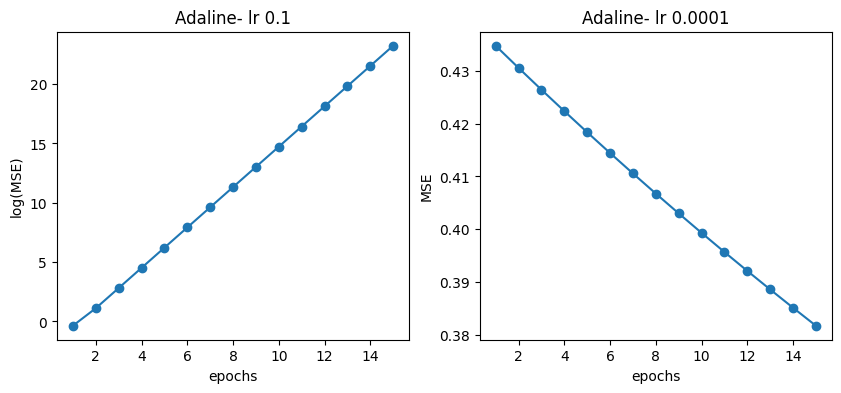

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = Adaline(eta=0.1, n_iter=15).fit(X,y)
ax[0].plot(range(1, len(ada.losses_)+1), np.log10(ada.losses_), marker='o')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline- lr 0.1')
ada2 = Adaline(eta=0.0001, n_iter=15).fit(X,y)
ax[1].plot(range(1, len(ada2.losses_)+1), ada2.losses_, marker='o')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('MSE')
ax[1].set_title('Adaline- lr 0.0001')
plt.show()

In [51]:
X.shape[1]

2

## Standardization

In [52]:
X_std = np.copy(X)
for i in range(X.shape[1]):
    X_std[:, i] = (X[:, i] - X[:, i].mean())/X[:, i].std()

In [53]:
X_std[:5]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952]])

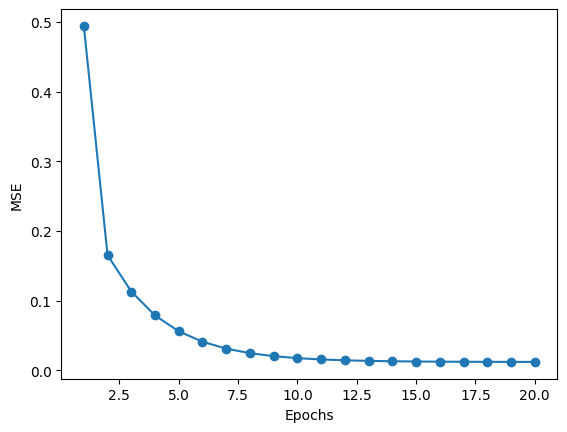

In [54]:
ada = Adaline(eta=0.5, n_iter=20).fit(X_std, y)
plt.plot(range(1, len(ada.losses_)+1), ada.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [55]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black'
                    )

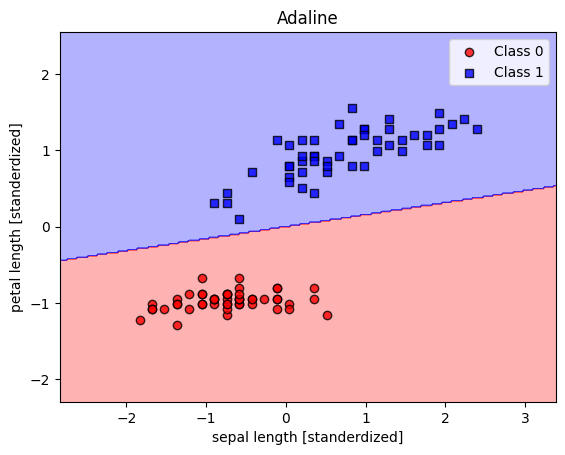

In [57]:
plot_decision_regions(X_std, y, ada)
plt.xlabel('sepal length [standerdized]')
plt.ylabel('petal length [standerdized]')
plt.title('Adaline')
plt.legend()
plt.show()

In [64]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
y.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Stochastic gradient descent

In [94]:
class AdalineSGD:
    def __init__(self, eta=0.5, n_iter=50, random_state=1, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self._weights_initialised = False

    def fit(self, X, y):
        self._initialise_weights(X)
        self.losses = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            losses = []            
            for xi, yi in zip(X,y):
                loss = self._update_weights(xi,yi)
                losses.append(loss)
            avg_loss = np.mean(losses)
            self.losses.append(avg_loss)
        return self

    def _initialise_weights(self, X):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self._weights_initialised = True

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _update_weights(self, X, y):
        output = self.activation(self.net_input(X))
        error = y - output
        self.w_ += 2 * self.eta * X.T.dot(error) / X.shape[0]
        self.b_ += 2 * self.eta * error.mean()

        loss = (error ** 2).mean()

        return loss

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, input):
        return input

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

    def partial_fit(self, X, y):
        if not self._weights_initialised:
            self._initialise_weights(X)

        for xi, yi in zip(X, y):
            self._update_weights(xi, yi)
        return self

    

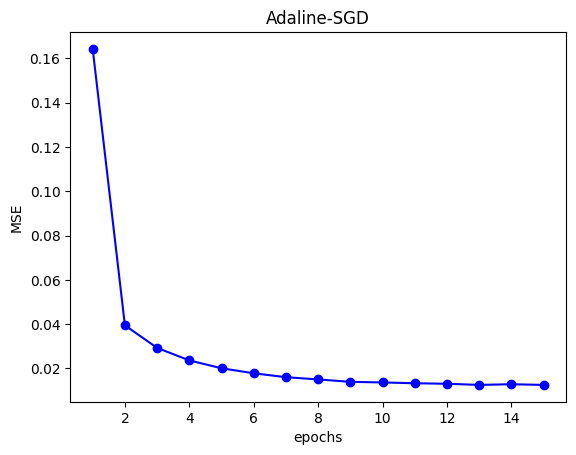

In [95]:
ada_sgd = AdalineSGD(eta=0.01, n_iter=15).fit(X_std,y)
# print(ada_sgd.losses)
plt.plot(range(1, len(ada_sgd.losses)+1), ada_sgd.losses, marker='o', color='blue')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Adaline-SGD')
plt.show()

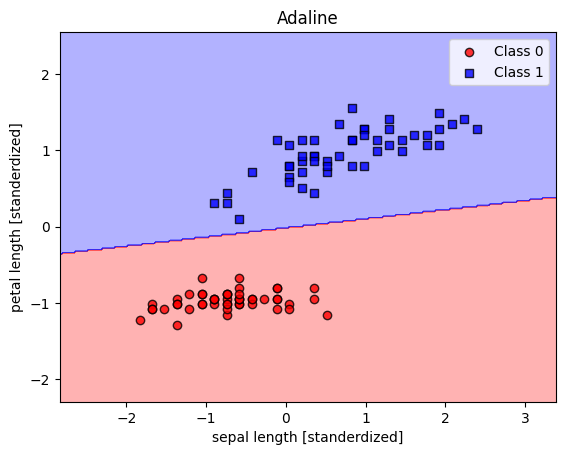

In [96]:
plot_decision_regions(X_std, y, ada_sgd)
plt.xlabel('sepal length [standerdized]')
plt.ylabel('petal length [standerdized]')
plt.title('Adaline')
plt.legend()
plt.show()